In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})

In [2]:
load1 =  pd.read_csv("Load1_SPO_warmstart_corrected.csv")
load2 =  pd.read_csv("Load2_SPO_warmstart_corrected.csv")
load6 =  pd.read_csv("Load6_SPO_warmstart_corrected.csv")

In [3]:
load1.groupby(['reset','presolve','warmstart']).size().reset_index().rename(columns={0:'count'})

,reset,presolve,warmstart,count
0,False,True,False,2640
1,False,True,True,2640
2,True,False,False,2640
3,True,True,False,2640


In [4]:
load2.groupby(['reset','presolve','warmstart']).size().reset_index().rename(columns={0:'count'})

,reset,presolve,warmstart,count
0,False,True,False,2640
1,False,True,True,2640
2,True,False,False,2640
3,True,True,False,2640


In [5]:
load6.groupby(['reset','presolve','warmstart']).size().reset_index().rename(columns={0:'count'})

,reset,presolve,warmstart,count
0,False,True,False,880
1,False,True,True,880
2,True,False,False,880
3,True,True,False,880


In [6]:
model_name = pd.DataFrame({'reset': [True,True,False,False],
                   'presolve': [False,True,True,True],
                   'warmstart': [False,False,False,True],
             "model":['baseline','presolve','prestart','prebest']})
model_name

,reset,presolve,warmstart,model
0,True,False,False,baseline
1,True,True,False,presolve
2,False,True,False,prestart
3,False,True,True,prebest


In [7]:

load1 = load1.merge(model_name,on=["reset","presolve","warmstart"])
load2 = load2.merge(model_name,on=["reset","presolve","warmstart"])
load6 = load6.merge(model_name,on=["reset","presolve","warmstart"])

load1 = load1.sort_values(by=['model'])
load2 = load2.sort_values(by=['model'])
load6 = load6.sort_values(by=['model'])

In [16]:
l1 = load1.groupby(['model','subepoch'],as_index= False).agg(
                      {'Runtime':['mean','std']}).reset_index(0, drop=True)
l2 = load2.groupby(['model','subepoch'],as_index= False).agg(
                      {'Runtime':['mean','std']}).reset_index(0, drop=True)
l3 = load6.groupby(['model','subepoch'],as_index= False).agg(
                      {'Runtime':['mean','std']}).reset_index(0, drop=True)

l1[(l1['model']=="baseline")&(l1['subepoch']==1002)].reset_index(drop=True)

model subepoch    Runtime          
                           mean       std
0  baseline     1002  12.175541  2.338907

In [17]:
l1[(l1['model']=="prebest")&(l1['subepoch']==1002)].reset_index(drop=True)

model subepoch  Runtime          
                        mean       std
0  prebest     1002  2.16046  0.465674

In [20]:
l2[(l2['model']=="baseline")&(l2['subepoch']==3010)].reset_index(drop=True)

model subepoch    Runtime          
                           mean       std
0  baseline     3010  39.182485  7.305852

In [23]:
l3[(l3['model']=="baseline")&(l3['subepoch']==2006)].reset_index(drop=True)

model subepoch    Runtime        
                           mean     std
0  baseline     2006  35.956951  1.6276

In [24]:
l3[(l3['model']=="prebest")&(l3['subepoch']==2006)].reset_index(drop=True)

model subepoch   Runtime          
                         mean       std
0  prebest     2006  7.153523  0.307344

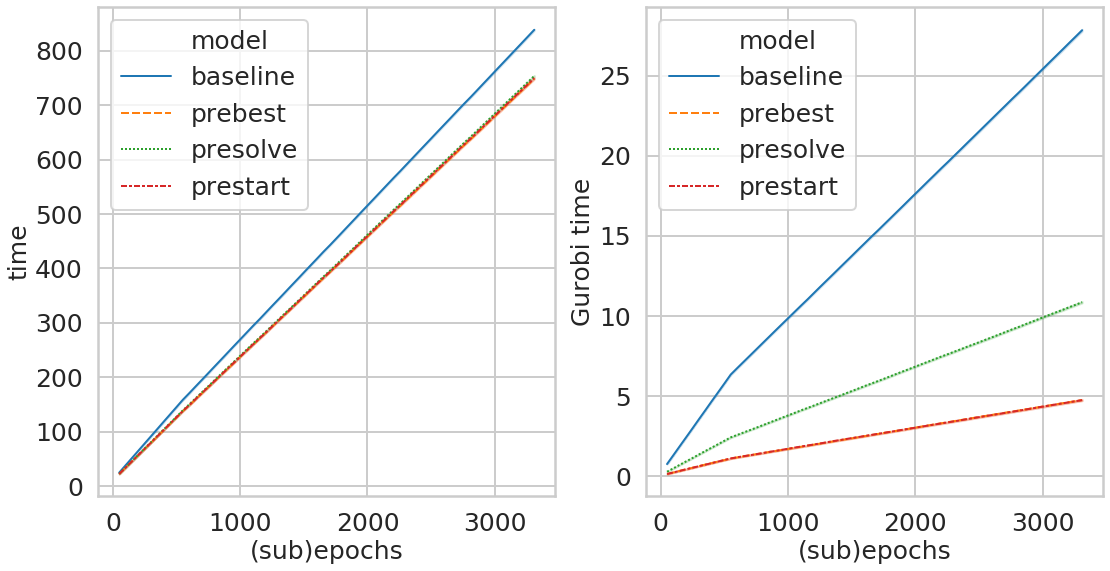

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('')
sns.lineplot(x='subepoch', y='time',
                    hue='model',style='model',ax= ax1,
              data= load1)
ax1.set_xlabel('(sub)epochs',fontsize= 25)
ax1.set_ylabel('time',fontsize= 25)
ax1.tick_params(labelsize=25)
ax1.legend(loc="upper left",fontsize=25)

sns.lineplot(x='subepoch', y='Runtime',
                    hue='model',style='model',ax= ax2,
              data= load1)
ax2.set_xlabel('(sub)epochs',fontsize= 25)
ax2.set_ylabel('Gurobi time',fontsize= 25)
ax2.tick_params(labelsize=25)
ax2.legend(loc="upper left",fontsize=25)


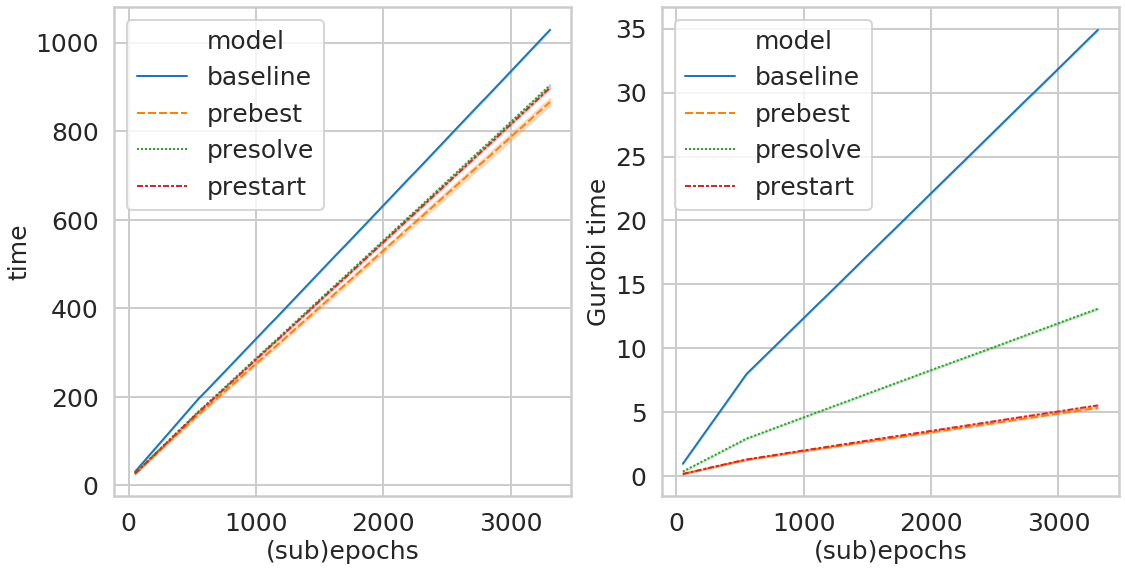

In [9]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('')
sns.lineplot(x='subepoch', y='time',
                    hue='model',style='model',ax= ax1,
              data= load2)
ax1.set_xlabel('(sub)epochs',fontsize= 25)
ax1.set_ylabel('time',fontsize= 25)
ax1.tick_params(labelsize=25)
ax1.legend(loc="upper left",fontsize=25)

sns.lineplot(x='subepoch', y='Runtime',
                    hue='model',style='model',ax= ax2,
              data= load2)
ax2.set_xlabel('(sub)epochs',fontsize= 25)
ax2.set_ylabel('Gurobi time',fontsize= 25)
ax2.tick_params(labelsize=25)
ax2.legend(loc="upper left",fontsize=25)

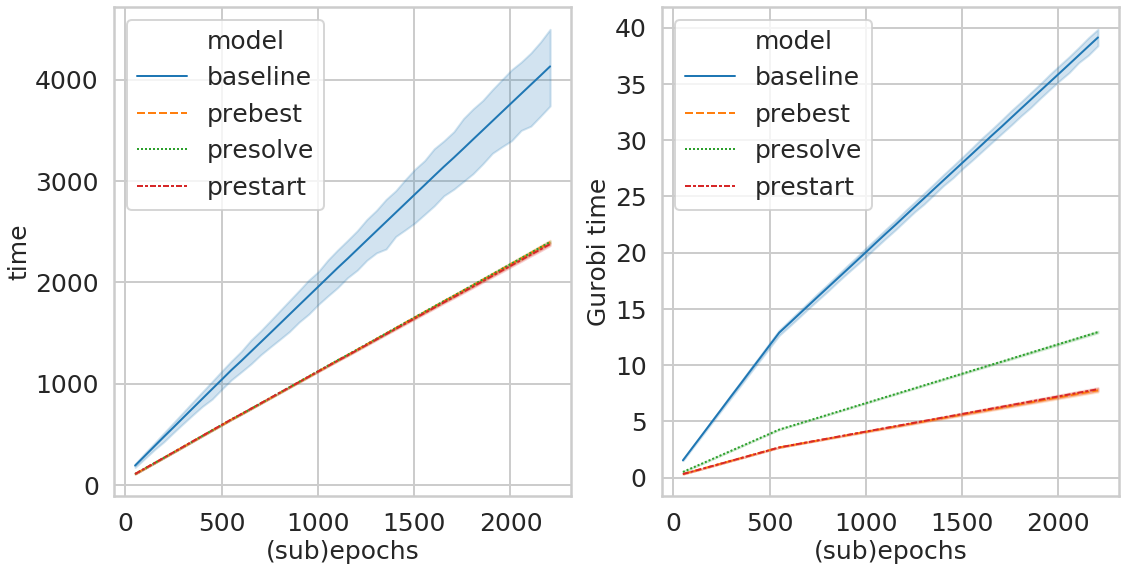

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('')
sns.lineplot(x='subepoch', y='time',
                    hue='model',style='model',ax= ax1,
              data= load6)
ax1.set_xlabel('(sub)epochs',fontsize= 25)
ax1.set_ylabel('time',fontsize= 25)
ax1.tick_params(labelsize=25)
ax1.legend(loc="upper left",fontsize=25)

sns.lineplot(x='subepoch', y='Runtime',
                    hue='model',style='model',ax= ax2,
              data= load6)
ax2.set_xlabel('(sub)epochs',fontsize= 25)
ax2.set_ylabel('Gurobi time',fontsize= 25)
ax2.tick_params(labelsize=25)
ax2.legend(loc="upper left",fontsize=25)

In [11]:
load1.Runtime = load1.Runtime.round(decimals=0)
load1.time = load1.time.round(decimals=-1)
load2.Runtime = load2.Runtime.round(decimals=0)
load2.time = load2.time.round(decimals=-1)
load6.Runtime = load6.Runtime.round(decimals=0)
load6.time = load6.time.round(decimals=-1)

<Figure size 432x288 with 0 Axes>

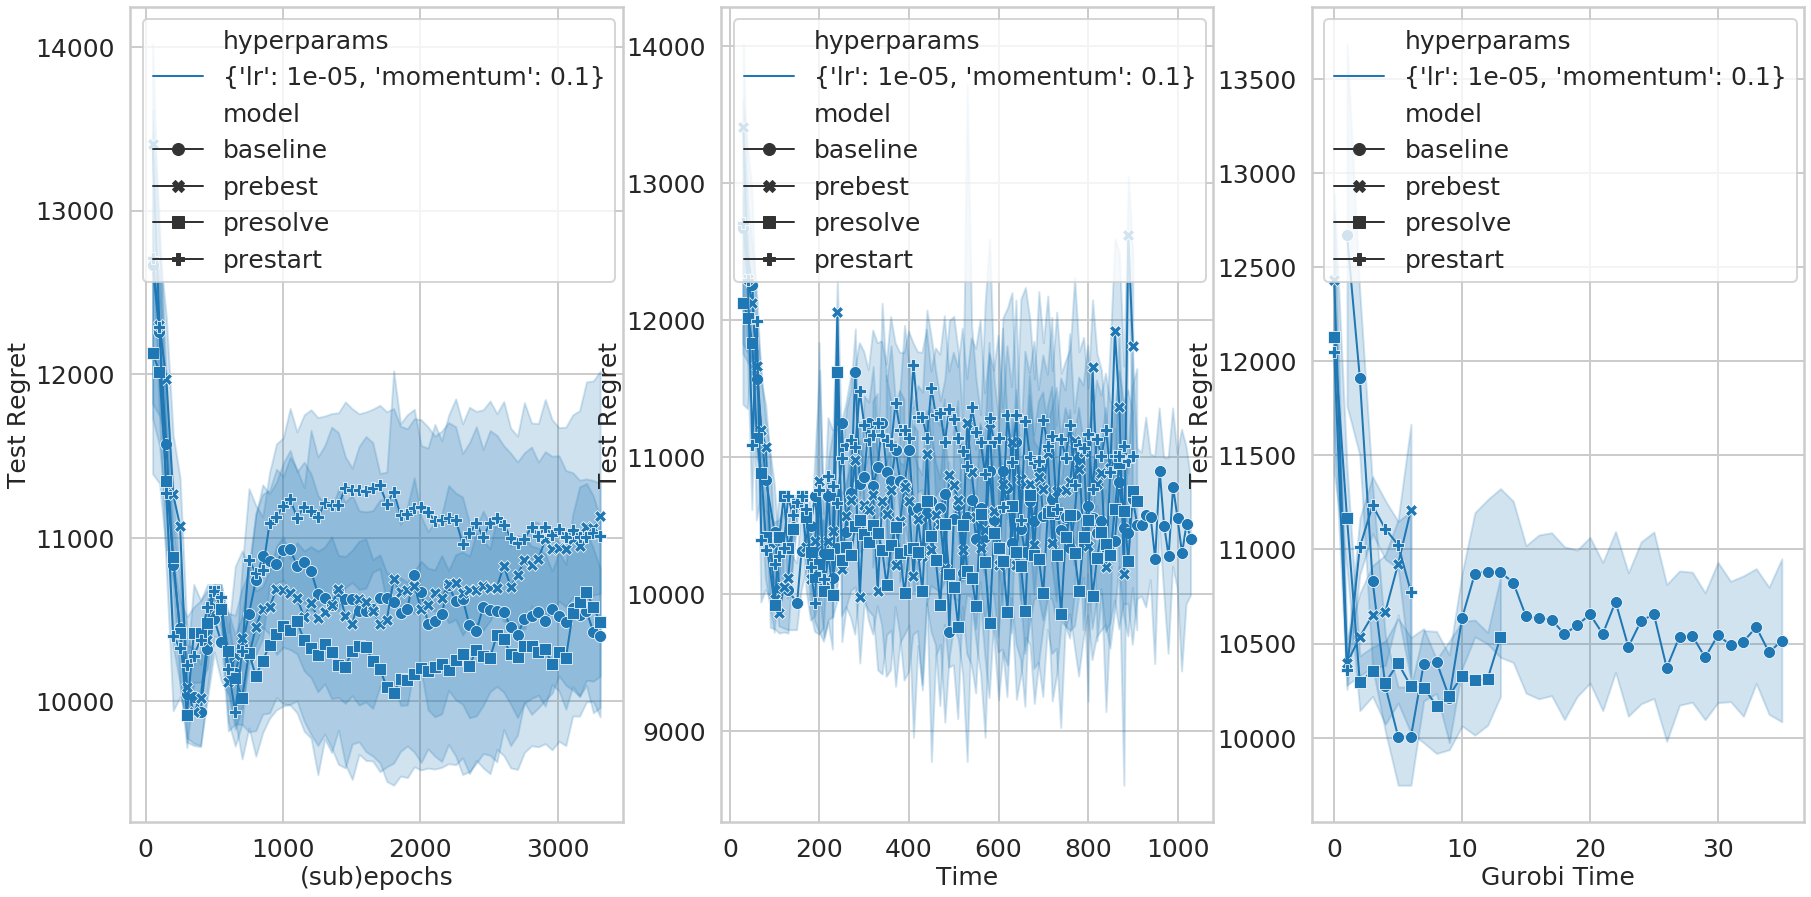

<Figure size 432x288 with 0 Axes>

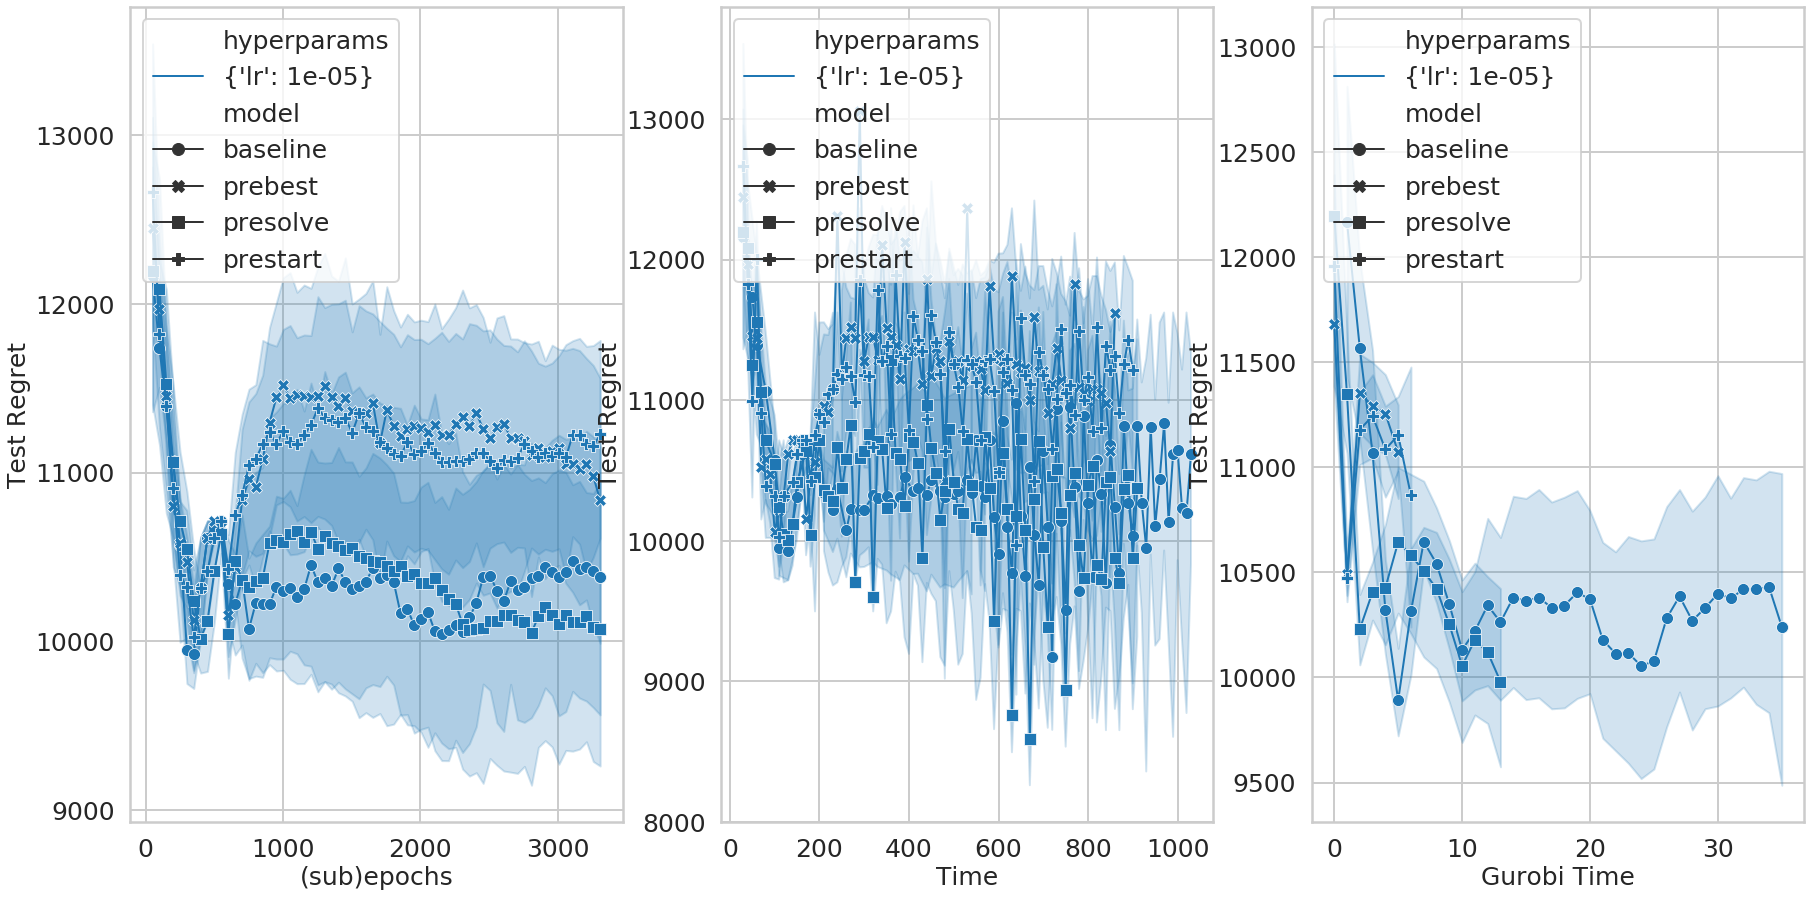

In [12]:
for h in pd.unique(load2.hyperparams):
    plt.figure()

    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(30,15))
    fig.suptitle('')
    sns.lineplot(x='subepoch', y='test_regret_full',
                       markers=True, dashes=False,hue="hyperparams",style='model',ax= ax1,
                  data= load2[load2.hyperparams==h])
    ax1.set_xlabel('(sub)epochs',fontsize= 25)
    ax1.set_ylabel('Test Regret',fontsize= 25)
    ax1.tick_params(labelsize=25)
    ax1.legend(loc="upper left",fontsize=25)
    #ax1.set_ylim(7000,13000)
    sns.lineplot(x='time', y='test_regret_full',
                        markers=True, dashes=False,hue="hyperparams",style='model',ax= ax2,
                  data= load2[load2.hyperparams==h])
    ax2.set_xlabel('Time',fontsize= 25)
    ax2.set_ylabel('Test Regret',fontsize= 25)
    ax2.tick_params(labelsize=25)
    ax2.legend(loc="upper left",fontsize=25)
    #ax2.set_ylim(7000,13000)
    sns.lineplot(x='Runtime', y='test_regret_full',
                        markers=True, dashes=False,hue="hyperparams",style='model',ax= ax3,
                  data= load2[load2.hyperparams==h])
    ax3.set_xlabel('Gurobi Time',fontsize= 25)
    ax3.set_ylabel('Test Regret',fontsize= 25)
    ax3.tick_params(labelsize=25)
    ax3.legend(loc="upper left",fontsize=25)
    #ax3.set_ylim(7000,13000)

<Figure size 432x288 with 0 Axes>

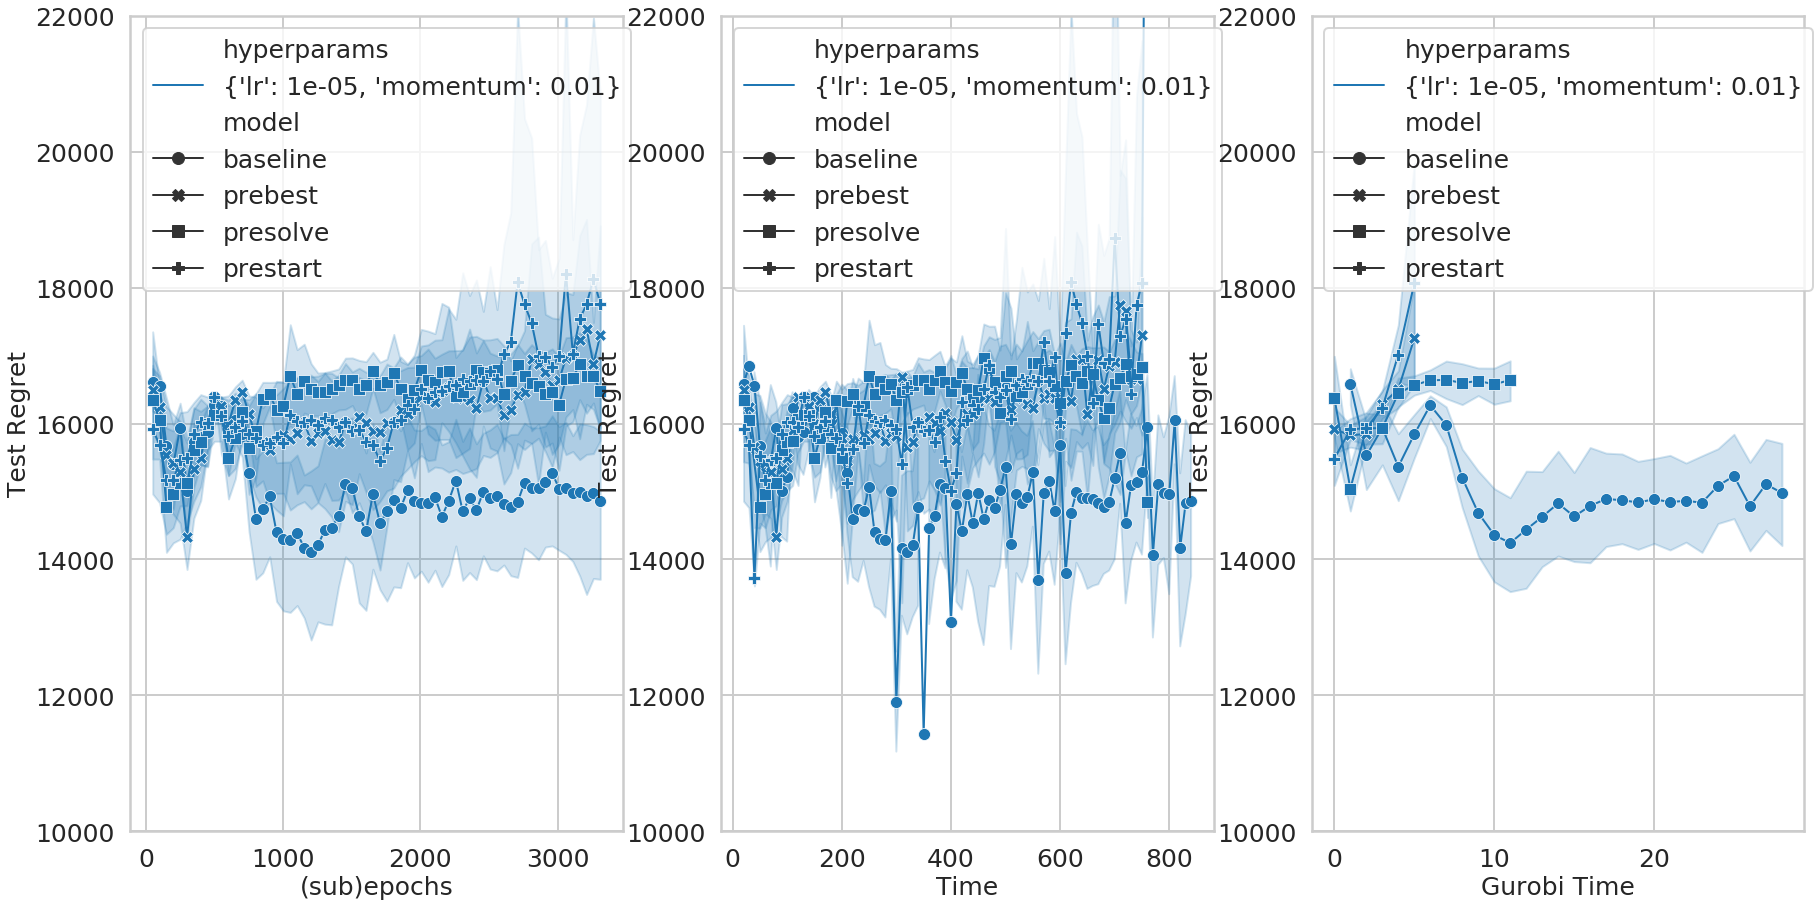

<Figure size 432x288 with 0 Axes>

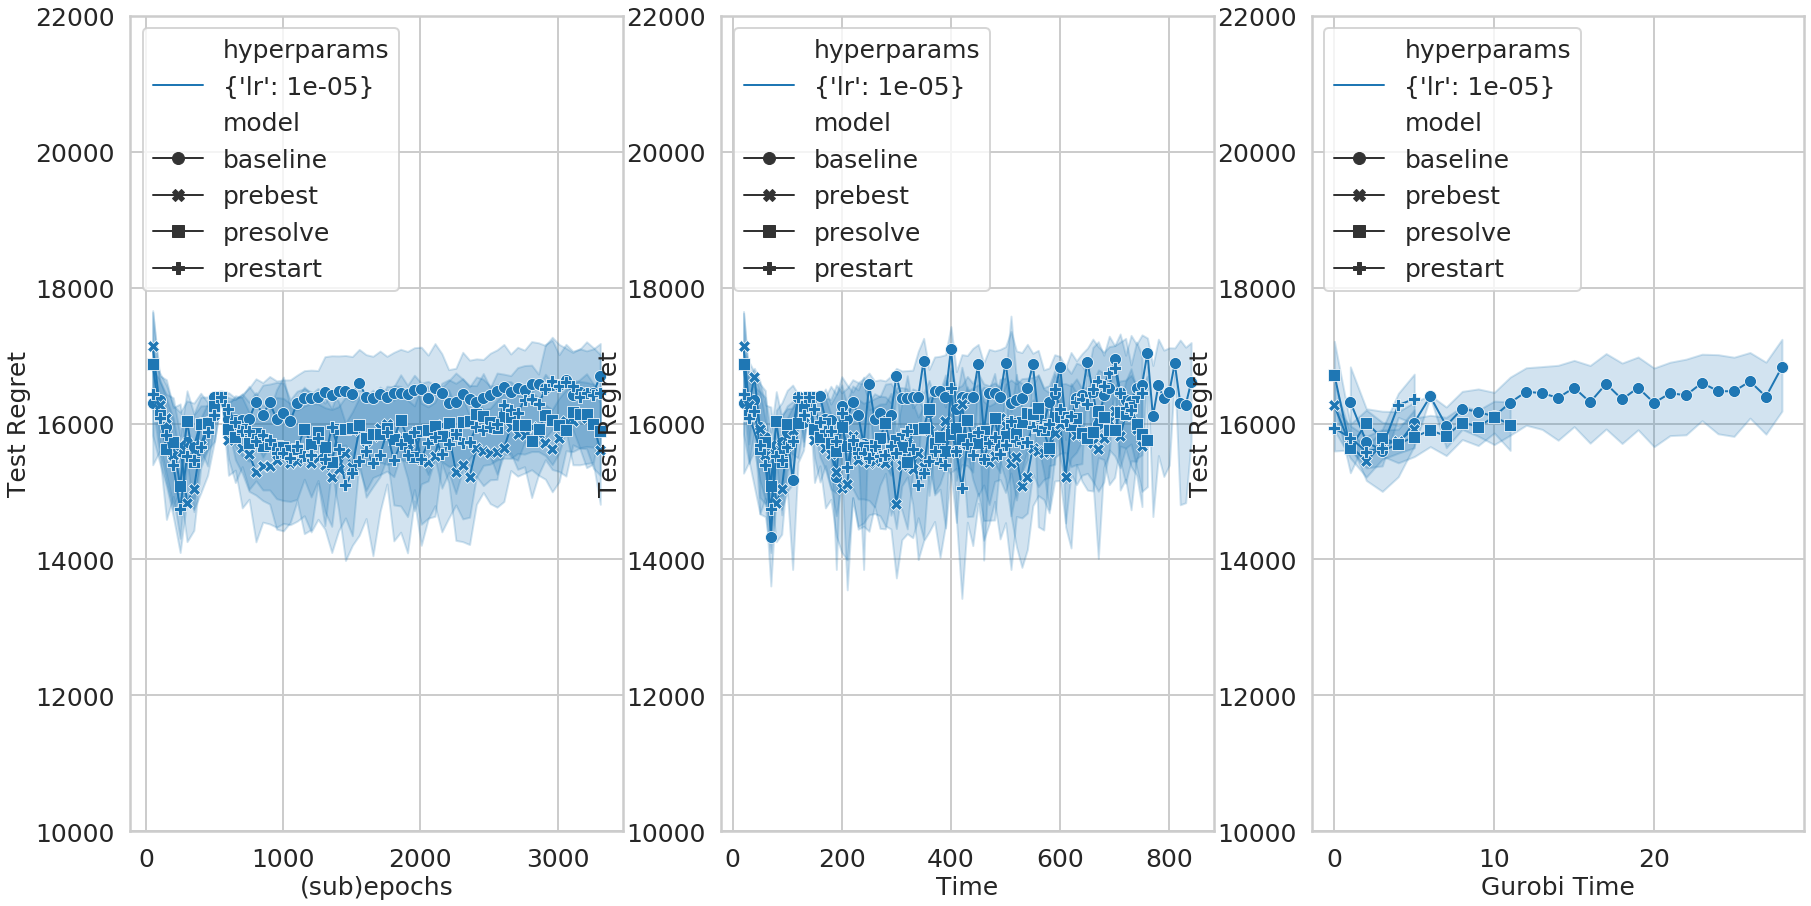

In [13]:
for h in pd.unique(load1.hyperparams):
    plt.figure()    
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(30,15))
    fig.suptitle('')
    sns.lineplot(x='subepoch', y='test_regret_full',
                       markers=True, dashes=False,hue="hyperparams",style='model',ax= ax1,
                  data= load1[load1.hyperparams==h])
    ax1.set_xlabel('(sub)epochs',fontsize= 25)
    ax1.set_ylabel('Test Regret',fontsize= 25)
    ax1.tick_params(labelsize=25)
    ax1.legend(loc="upper left",fontsize=25)
    ax1.set_ylim(10000,22000)
    sns.lineplot(x='time', y='test_regret_full',
                        markers=True, dashes=False,hue="hyperparams",style='model',ax= ax2,
                  data= load1[load1.hyperparams==h])
    ax2.set_xlabel('Time',fontsize= 25)
    ax2.set_ylabel('Test Regret',fontsize= 25)
    ax2.tick_params(labelsize=25)
    ax2.legend(loc="upper left",fontsize=25)
    ax2.set_ylim(10000,22000)
    sns.lineplot(x='Runtime', y='test_regret_full',
                        markers=True, dashes=False,hue="hyperparams",style='model',ax= ax3,
                  data= load1[load1.hyperparams==h])
    ax3.set_xlabel('Gurobi Time',fontsize= 25)
    ax3.set_ylabel('Test Regret',fontsize= 25)
    ax3.tick_params(labelsize=25)
    ax3.legend(loc="upper left",fontsize=25)
    ax3.set_ylim(10000,22000)

<Figure size 432x288 with 0 Axes>

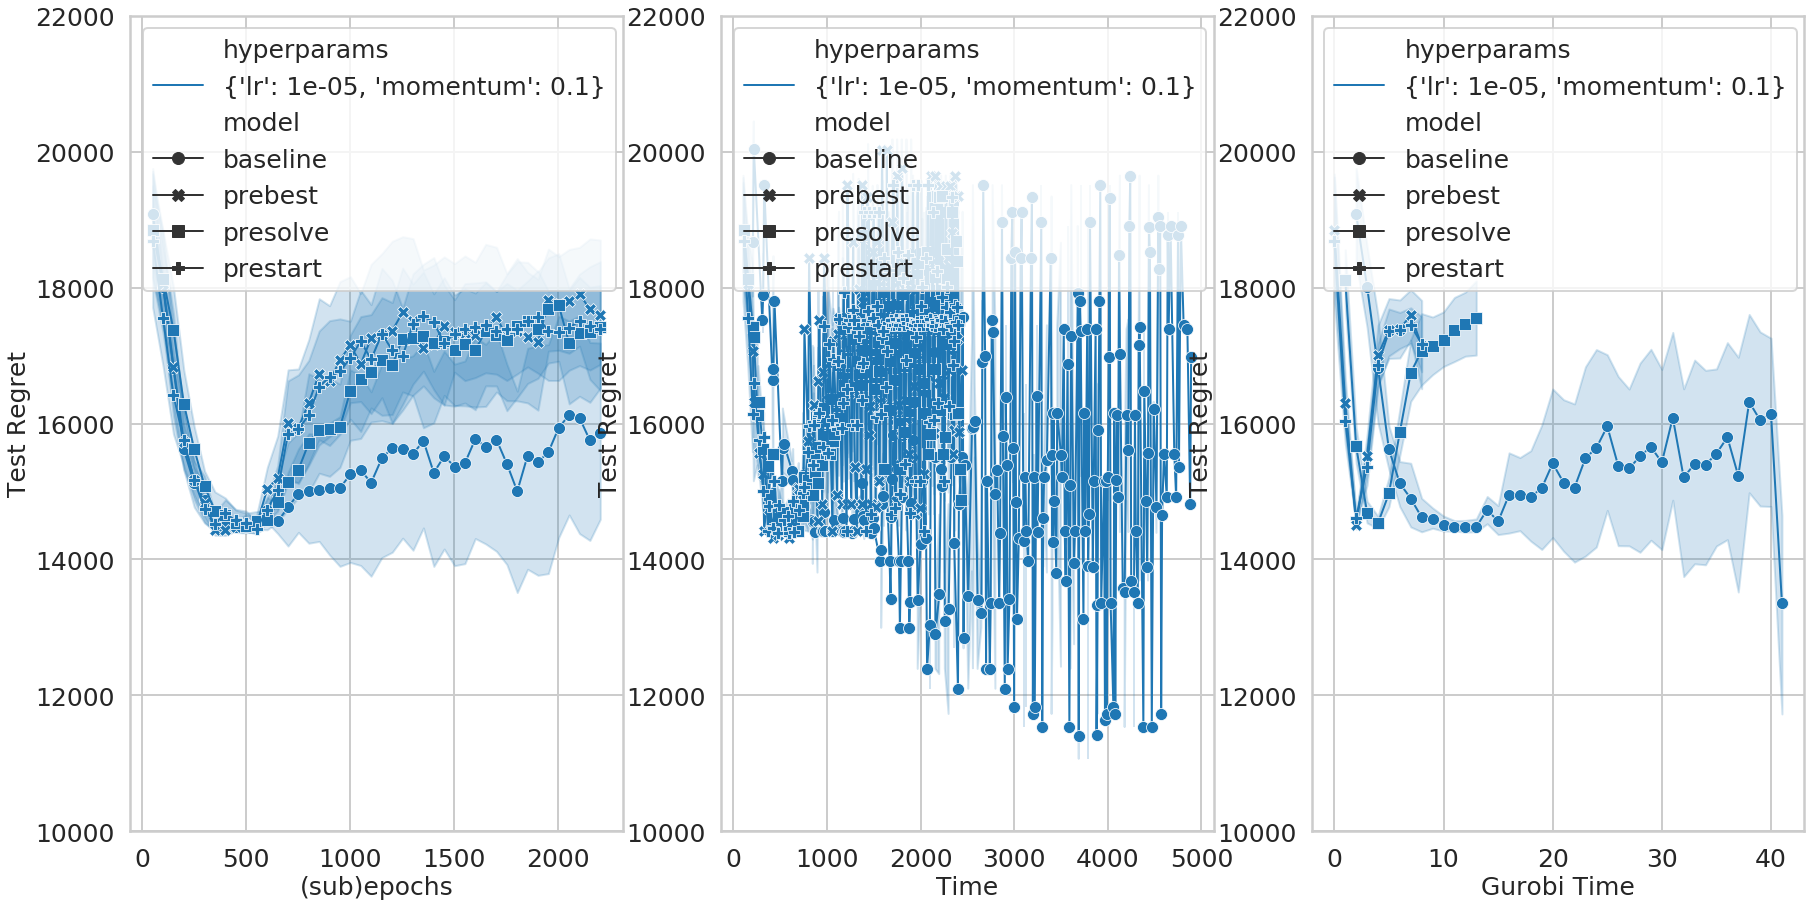

<Figure size 432x288 with 0 Axes>

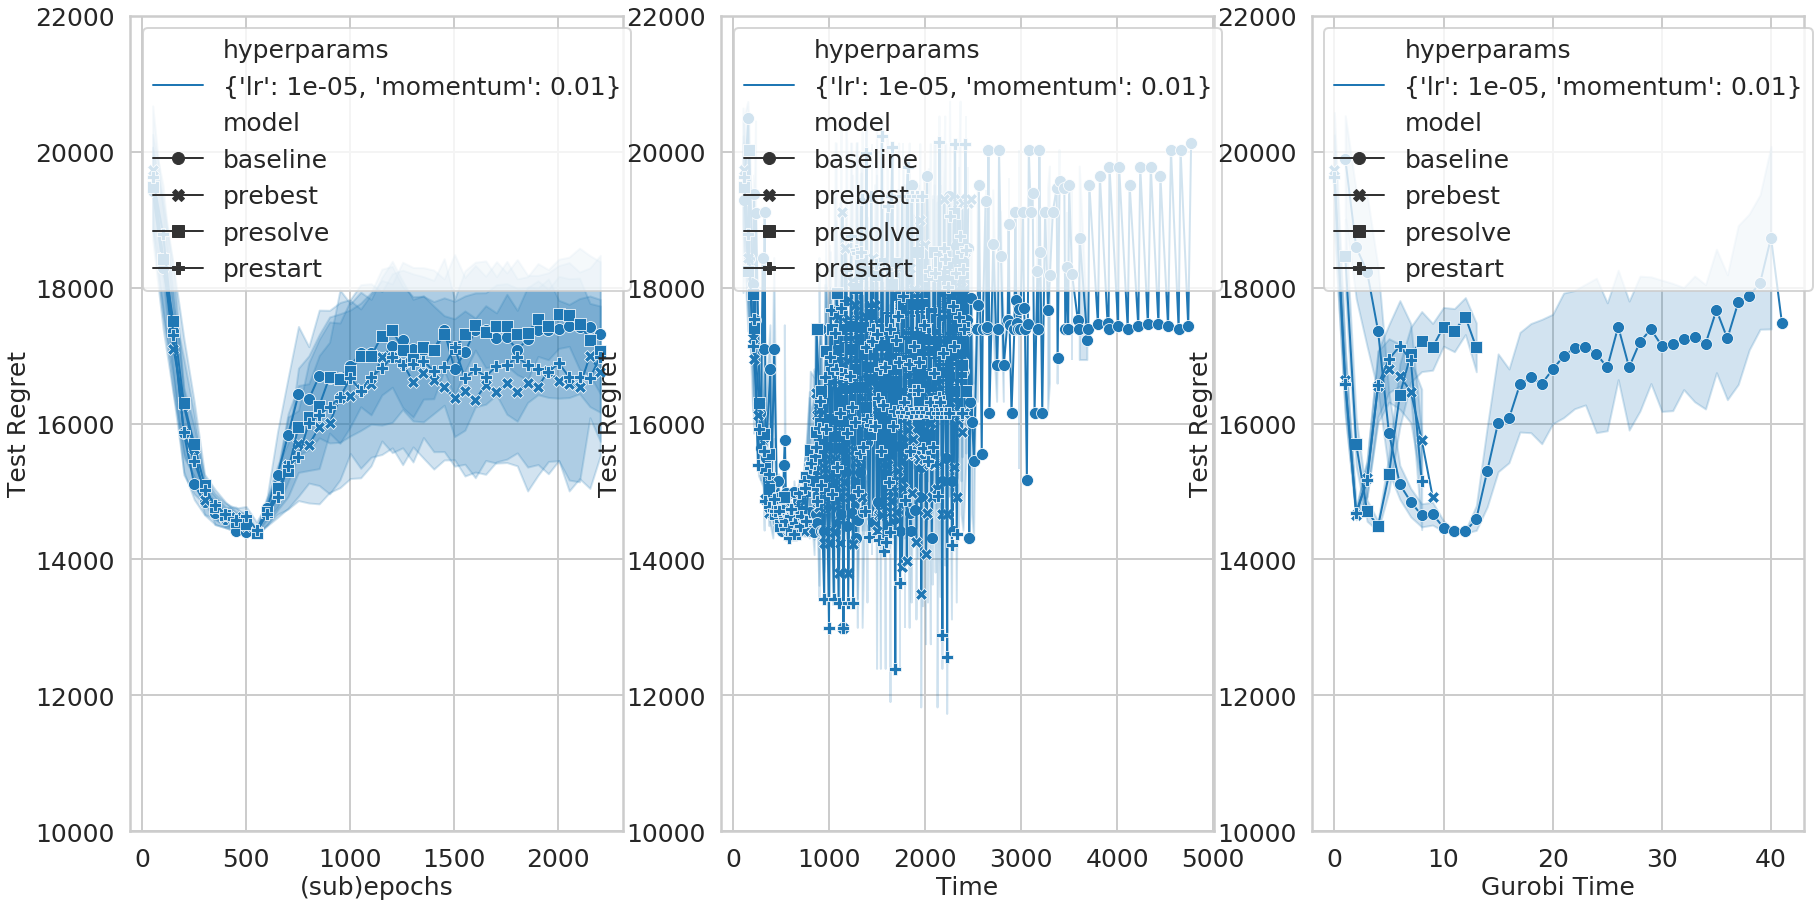

In [14]:
for h in pd.unique(load6.hyperparams):
    plt.figure()    
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(30,15))
    fig.suptitle('')
    sns.lineplot(x='subepoch', y='test_regret_full',
                       markers=True, dashes=False,hue="hyperparams",style='model',ax= ax1,
                  data= load6[load6.hyperparams==h])
    ax1.set_xlabel('(sub)epochs',fontsize= 25)
    ax1.set_ylabel('Test Regret',fontsize= 25)
    ax1.tick_params(labelsize=25)
    ax1.legend(loc="upper left",fontsize=25)
    ax1.set_ylim(10000,22000)
    sns.lineplot(x='time', y='test_regret_full',
                        markers=True, dashes=False,hue="hyperparams",style='model',ax= ax2,
                  data= load6[load6.hyperparams==h])
    ax2.set_xlabel('Time',fontsize= 25)
    ax2.set_ylabel('Test Regret',fontsize= 25)
    ax2.tick_params(labelsize=25)
    ax2.legend(loc="upper left",fontsize=25)
    ax2.set_ylim(10000,22000)
    sns.lineplot(x='Runtime', y='test_regret_full',
                        markers=True, dashes=False,hue="hyperparams",style='model',ax= ax3,
                  data= load6[load6.hyperparams==h])
    ax3.set_xlabel('Gurobi Time',fontsize= 25)
    ax3.set_ylabel('Test Regret',fontsize= 25)
    ax3.tick_params(labelsize=25)
    ax3.legend(loc="upper left",fontsize=25)
    ax3.set_ylim(10000,22000)

In [10]:
hard0_prd = pd.read_csv("Hard00/Hard00_pred_solutions_final.csv")
hard0_tst =  pd.read_csv("Hard00/Hard00_test_solutions.csv")
hard0_mse = pd.read_csv("Hard00/Hard0_MSE_solutions.csv")
hard0  =  hard0_tst.merge(pd.concat([hard0_prd,hard0_mse]),left_on="instance",right_on="instance")
hard0.columns=  ['instance','optimal','model','predicted-optimal','time']
hard0['regret'] = hard0['predicted-optimal'] - hard0['optimal']
hard0.groupby('model').agg({'regret':'median'})

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,regret
model,
../Results/Hard00/SPO_hard00.presolve_0_Epoch0_180.pth,74572.838357
../Results/Hard00/SPO_hard00.presolve_0_Epoch0_270.pth,79989.994831
../Results/Hard00/SPO_hard00.presolve_0_Epoch0_350.pth,81058.483420
../Results/Hard00/SPO_hard00.presolve_0_Epoch0_90.pth,72662.271088
../Results/MSE_pred/MSE-prediction_test_epoch10.npy,88757.946960
../Results/MSE_pred/MSE-prediction_test_epoch2.npy,90769.250871
../Results/MSE_pred/MSE-prediction_test_epoch20.npy,91818.890411
../Results/MSE_pred/MSE-prediction_test_epoch4.npy,88952.201280
../Results/MSE_pred/MSE-prediction_test_epoch6.npy,86059.751321


In [13]:
hard1_prd = pd.read_csv("Hard01/Hard01_pred_solutions_final.csv")
hard1_tst =  pd.read_csv("Hard01/Hard01_test_solutions.csv")
hard1_mse = pd.read_csv("Hard01/Hard1_MSE_solutions.csv")
hard1  =  hard1_tst.merge(pd.concat([hard1_prd,hard1_mse]) ,left_on="instance",right_on="instance")
hard1.columns=  ['instance','optimal','model','predicted-optimal','time']
hard1['regret'] = hard1['predicted-optimal'] - hard1['optimal']
hard1.groupby('model').agg({'regret':'median'})

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,regret
model,
../Results/Hard01/SPO_hard01.presolve_0_Epoch0_160.pth,110943.916183
../Results/Hard01/SPO_hard01.presolve_0_Epoch0_240.pth,114799.388098
../Results/Hard01/SPO_hard01.presolve_0_Epoch0_320.pth,114377.243684
../Results/Hard01/SPO_hard01.presolve_0_Epoch0_80.pth,120799.786732
../Results/MSE_pred/MSE-prediction_test_epoch10.npy,124719.223854
../Results/MSE_pred/MSE-prediction_test_epoch2.npy,128067.943048
../Results/MSE_pred/MSE-prediction_test_epoch20.npy,123625.281574
../Results/MSE_pred/MSE-prediction_test_epoch4.npy,124450.569411
../Results/MSE_pred/MSE-prediction_test_epoch6.npy,124280.286657


In [14]:
hard2_prd = pd.read_csv("Hard02/Hard02_pred_solutions_final.csv")
hard2_tst =  pd.read_csv("Hard02/Hard02_test_solutions.csv")
hard2_mse = pd.read_csv("Hard02/Hard2_MSE_solutions.csv")
hard2  =  hard2_tst.merge(pd.concat([hard2_prd,hard2_mse]) ,left_on="instance",right_on="instance")
hard2.columns=  ['instance','optimal','model','predicted-optimal','time']
hard2['regret'] = hard2['predicted-optimal'] - hard2['optimal']
hard2.groupby('model').agg({'regret':'median'})

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,regret
model,
../Results/Hard02/SPO_hard02.presolve_0_Epoch0_130.pth,108748.236206
../Results/Hard02/SPO_hard02.presolve_0_Epoch0_250.pth,102203.398109
../Results/Hard02/SPO_hard02.presolve_0_Epoch0_380.pth,112969.372382
../Results/Hard02/SPO_hard02.presolve_0_Epoch0_500.pth,110368.351354
../Results/MSE_pred/MSE-prediction_test_epoch10.npy,119324.225748
../Results/MSE_pred/MSE-prediction_test_epoch2.npy,129761.780111
../Results/MSE_pred/MSE-prediction_test_epoch20.npy,119803.411820
../Results/MSE_pred/MSE-prediction_test_epoch4.npy,128400.414638
../Results/MSE_pred/MSE-prediction_test_epoch6.npy,122956.086642


In [15]:
hard3_prd = pd.read_csv("Hard03/Hard03_pred_solutions_final.csv")
hard3_tst =  pd.read_csv("Hard03/Hard03_test_solutions.csv")
hard3_mse = pd.read_csv("Hard03/Hard3_MSE_solutions.csv")
hard3  =  hard3_tst.merge(pd.concat([hard3_prd,hard3_mse]) ,left_on="instance",right_on="instance")
hard3.columns=  ['instance','optimal','model','predicted-optimal','time']
hard3['regret'] = hard3['predicted-optimal'] - hard3['optimal']
hard3.groupby('model').agg({'regret':'median'})

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,regret
model,
../Results/Hard03/SPO_hard03.presolve_0_Epoch0_150.pth,99657.469240
../Results/Hard03/SPO_hard03.presolve_0_Epoch0_230.pth,97351.297985
../Results/Hard03/SPO_hard03.presolve_0_Epoch0_300.pth,98063.415714
../Results/Hard03/SPO_hard03.presolve_0_Epoch0_80.pth,109694.208679
../Results/MSE_pred/MSE-prediction_test_epoch10.npy,131635.098554
../Results/MSE_pred/MSE-prediction_test_epoch2.npy,135397.348746
../Results/MSE_pred/MSE-prediction_test_epoch20.npy,130804.050466
../Results/MSE_pred/MSE-prediction_test_epoch4.npy,132366.825453
../Results/MSE_pred/MSE-prediction_test_epoch6.npy,132167.414627


In [16]:
hard4_prd = pd.read_csv("Hard04/Hard04_pred_solutions_final.csv")
hard4_tst =  pd.read_csv("Hard04/Hard04_test_solutions.csv")
hard4_mse = pd.read_csv("Hard04/Hard4_MSE_solutions.csv")
hard4  =  hard4_tst.merge(pd.concat([hard4_prd,hard4_mse]) ,left_on="instance",right_on="instance")
hard4.columns=  ['instance','optimal','model','predicted-optimal','time']
hard4['regret'] = hard4['predicted-optimal'] - hard4['optimal']
hard4.groupby('model').agg({'regret':'median'})

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,regret
model,
../Results/Hard04/SPO_hard04.presolve_0_Epoch0_110.pth,118946.245473
../Results/Hard04/SPO_hard04.presolve_0_Epoch0_220.pth,116959.221224
../Results/Hard04/SPO_hard04.presolve_0_Epoch0_340.pth,118459.370377
../Results/Hard04/SPO_hard04.presolve_0_Epoch0_450.pth,115882.179540
../Results/MSE_pred/MSE-prediction_test_epoch10.npy,125555.536238
../Results/MSE_pred/MSE-prediction_test_epoch2.npy,122310.297900
../Results/MSE_pred/MSE-prediction_test_epoch20.npy,125994.121966
../Results/MSE_pred/MSE-prediction_test_epoch4.npy,120949.298917
../Results/MSE_pred/MSE-prediction_test_epoch6.npy,122116.939057


In [4]:
hard5_prd = pd.read_csv("Hard05/Hard05_pred_solutions.csv")
hard5_tst =  pd.read_csv("Hard05/Hard05_test_solutions.csv")
hard5_mse = pd.read_csv("Hard05/Hard5_MSE_solutions.csv")
hard5  =  hard5_tst.merge( pd.concat([hard5_mse,hard5_prd]),left_on="instance",right_on="instance")
hard5.columns=  ['instance','optimal','predicted-optimal','model']

hard5['regret'] = hard5['predicted-optimal'] - hard5['optimal']
hard5.groupby('model').agg({'regret':'median'})

,regret
model,
../Results/Hard05/SPO_hard05.baseline_0_Epoch0_20.pth,170867.584958
../Results/Hard05/SPO_hard05.prebest_0_Epoch0_10.pth,153376.769336
../Results/Hard05/SPO_hard05.presolve_0_Epoch0_80.pth,145015.453381
../Results/Hard05/SPO_hard05.prestart_0_Epoch0_40.pth,141768.066386
../Results/MSE_pred/MSE-prediction_test_epoch4.npy,156900.653793


In [5]:
i = 1
str(2*i)+"hour"

'2hour'